# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

# Reading the dataset

In [2]:
df=pd.read_csv("car data.csv")

# Explore the basic information about the dataset

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
df.shape

(301, 9)

In [10]:
# checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df.replace({"Selling_type":{"Dealer":0,"Individual":1}},inplace=True)
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


<Axes: xlabel='Selling_Price', ylabel='count'>

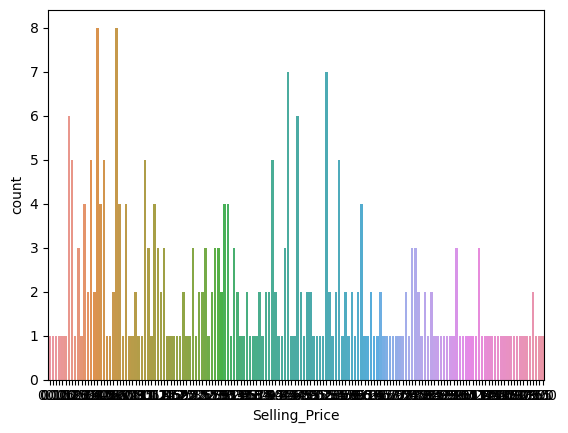

In [14]:
sns.countplot(x = 'Selling_Price', data=df)

<Axes: xlabel='Year', ylabel='count'>

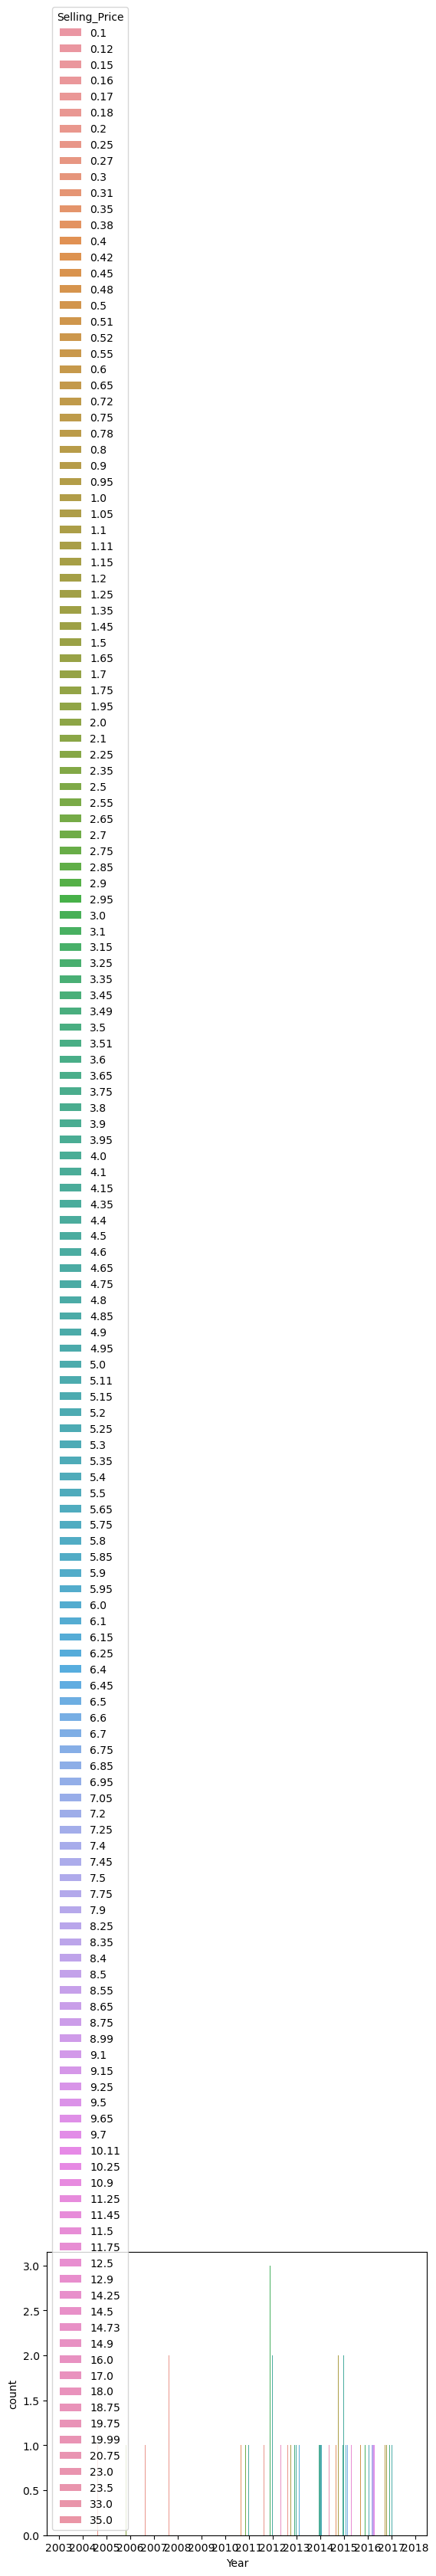

In [15]:
sns.countplot(x = 'Year', hue = 'Selling_Price', data = df)

<Axes: ylabel='Frequency'>

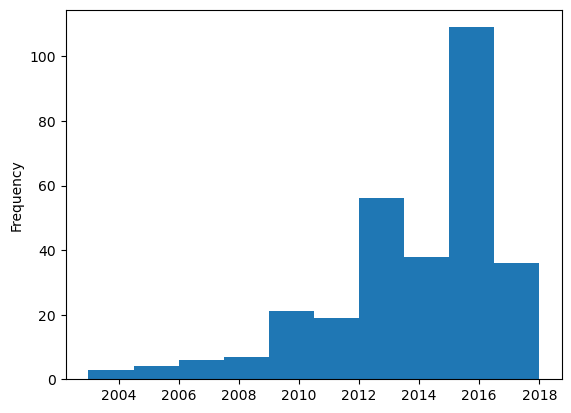

In [16]:
df['Year'].plot.hist()

<Axes: ylabel='Frequency'>

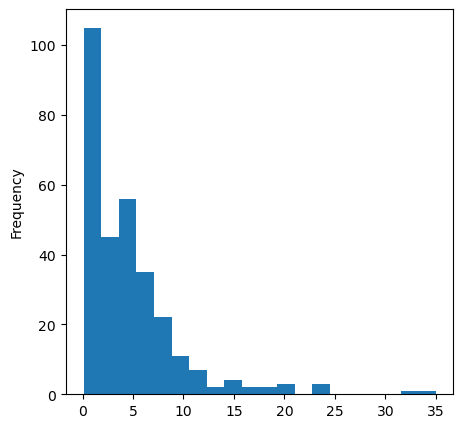

In [17]:
df["Selling_Price"].plot.hist(bins = 20 , figsize=(5,5))

<Axes: ylabel='Frequency'>

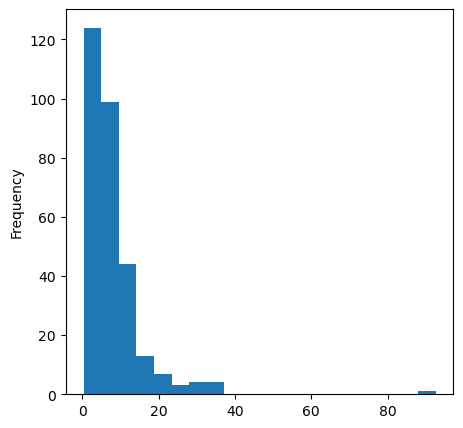

In [18]:
df["Present_Price"].plot.hist(bins = 20 , figsize=(5,5))

C:\Users\prajw\AppData\Local\Temp\ipykernel_11268\310574214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Present_Price'])


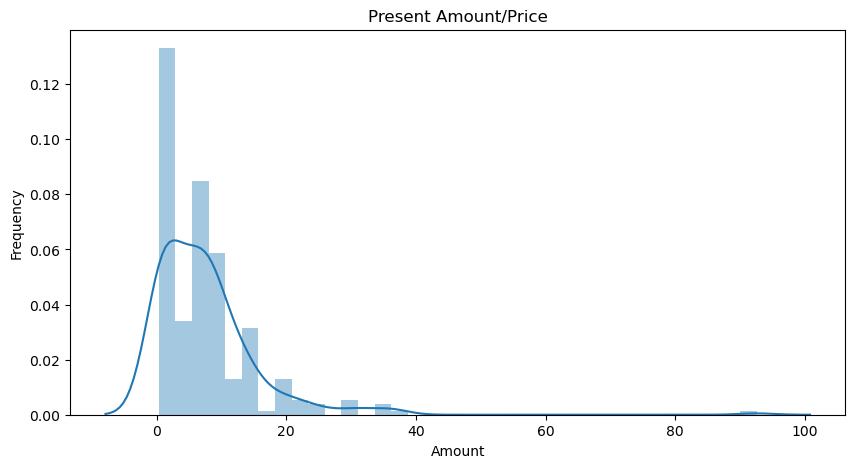

In [19]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Present_Price'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Present Amount/Price')
plt.show()

C:\Users\prajw\AppData\Local\Temp\ipykernel_11268\1736782932.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Driven_kms'])


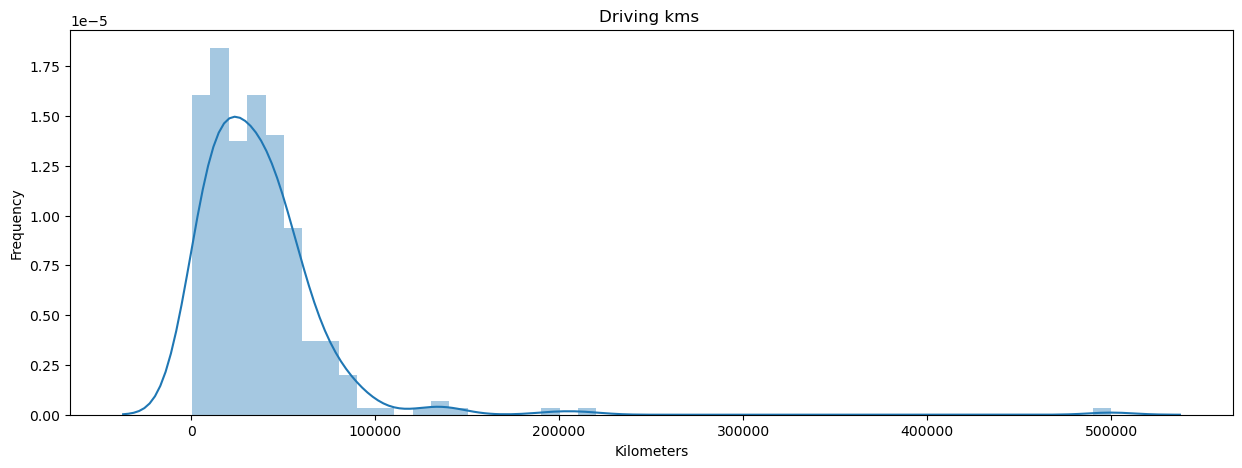

In [20]:
plt.figure(figsize=(15, 5))
sns.distplot(df['Driven_kms'])
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.title('Driving kms ')
plt.show()

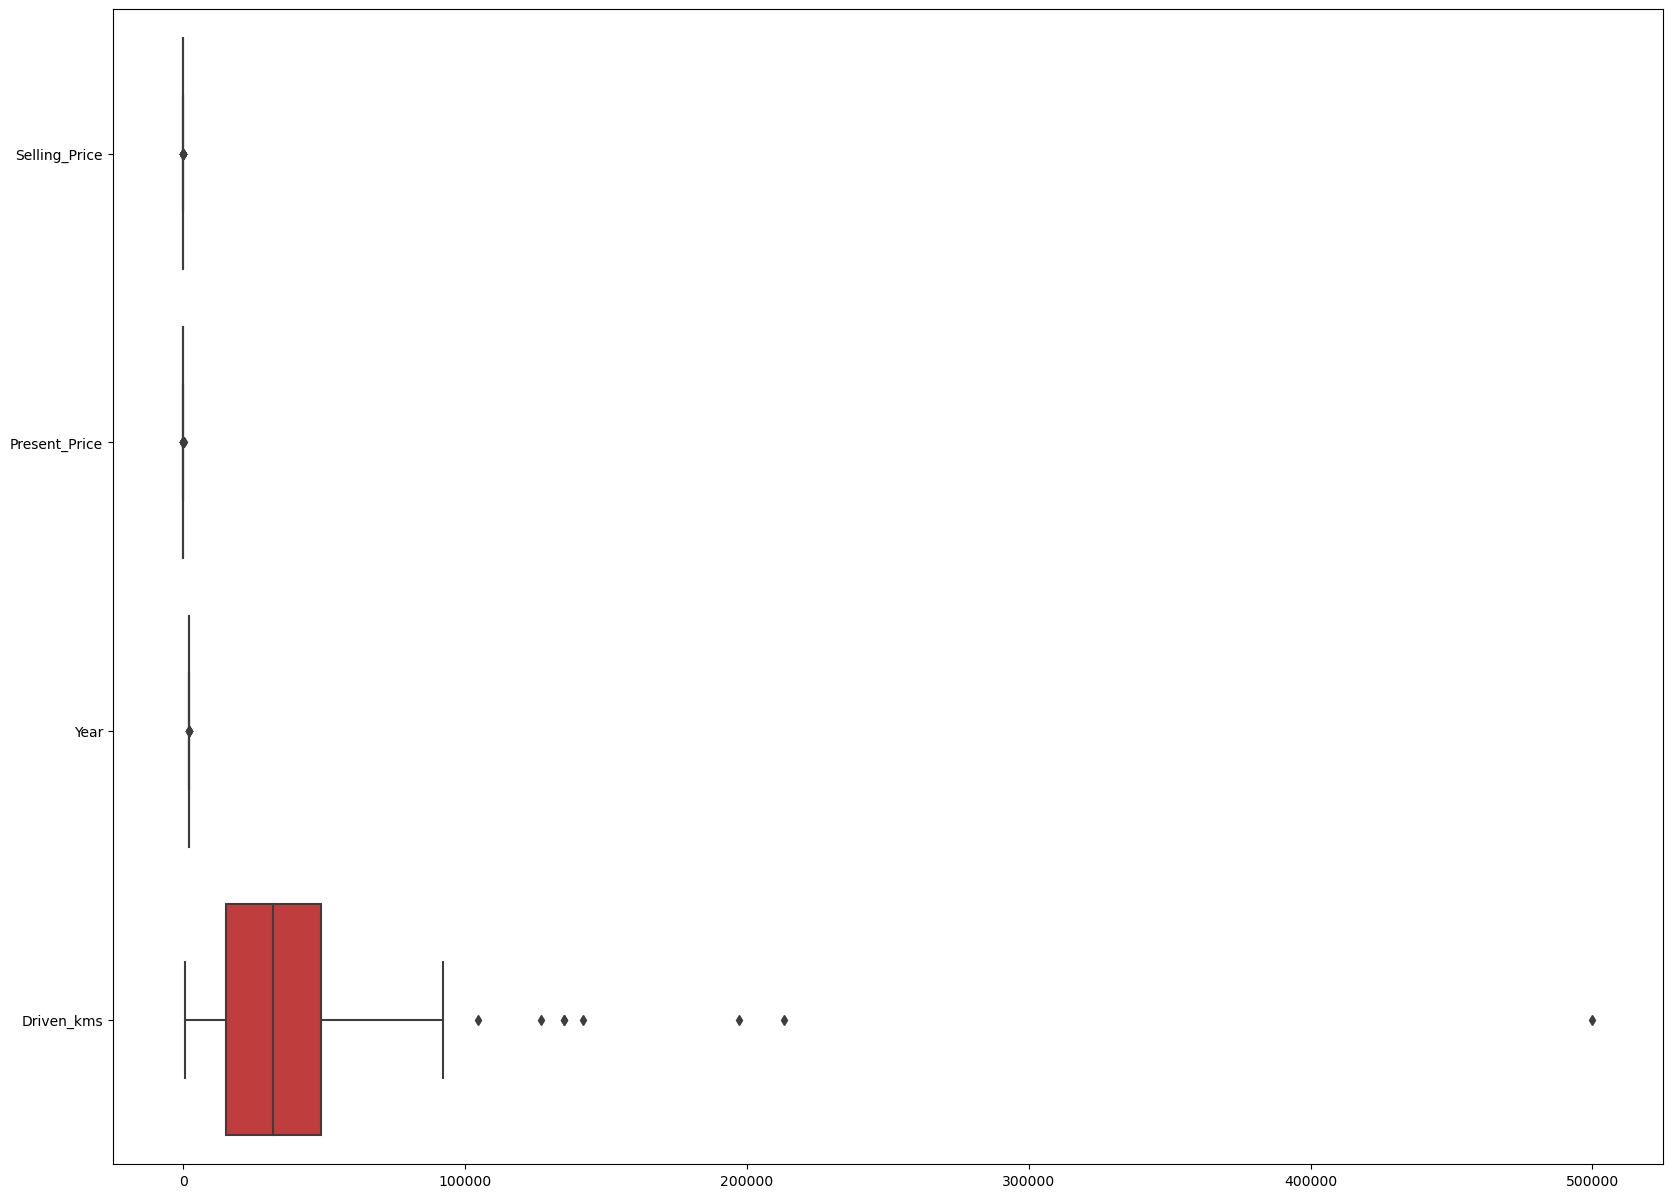

In [21]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df[["Selling_Price", "Present_Price", "Year","Driven_kms"]], orient="h")
plt.show()

In [22]:
X=df.drop(["Car_Name","Owner","Selling_Price"],axis=1)
Y=df["Selling_Price"]

In [23]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,0,0,0
1,2013,9.54,43000,1,0,0
2,2017,9.85,6900,0,0,0
3,2011,4.15,5200,0,0,0
4,2014,6.87,42450,1,0,0
...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0
297,2015,5.90,60000,0,0,0
298,2009,11.00,87934,0,0,0
299,2017,12.50,9000,1,0,0


In [24]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
train_set_x,test_set_x,train_set_y,test_set_y=train_test_split(X,Y,test_size=0.3,shuffle=True)
train_set_x.shape

(209, 6)

In [26]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(train_set_x,train_set_y)

LinearRegression()

In [27]:
y_pred = regr.predict(train_set_x)

In [28]:
from sklearn.metrics import r2_score
error_score=r2_score(train_set_y,y_pred)
print("R2 score: ",error_score)

R2 score:  0.8978504174768133


In [29]:
df["Selling_Price"].max()-df["Selling_Price"].min()

34.9

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("actualdata",train_set_y)
print("predictivevalues",y_pred)
mean_absolute_error(train_set_y,y_pred),np.sqrt(mean_squared_error(train_set_y,y_pred))

actualdata 280     5.25
26      4.15
291     5.40
293     3.25
298     3.35
       ...  
104     1.35
165     0.45
83     12.50
166     0.45
222     6.00
Name: Selling_Price, Length: 209, dtype: float64
predictivevalues [ 4.54766073e+00  2.87142805e+00  4.15680879e+00  5.20359559e+00
  4.15042429e+00  4.64450176e+00  7.07519033e-01  5.03395531e+00
  1.93239989e+00  1.09937837e+00  1.05839776e+01 -1.78913561e+00
  5.38764131e+00  4.82058259e+00  3.84958035e+00  5.38461826e+00
  1.35790619e+00  9.15865938e-01  2.34854966e+00  1.96851398e+00
  1.65125617e+00  7.20685839e-01 -1.57746909e+00 -3.60745997e-01
  1.80832281e+00  8.17244909e+00 -6.90833874e-01  1.71959640e+00
  5.60454528e+00  5.55465878e+00  8.74067439e-01  9.04763229e+00
  1.81285766e+00 -2.39027853e+00 -7.61298341e-01  7.37508605e+00
  4.33198123e+00  4.09622950e+00  7.63953336e-01  3.92912999e+00
  6.47357561e+00  4.35137317e+00  2.46841270e+00 -2.41025386e-02
  1.14723610e+00  5.70811625e+00  1.12850290e+00  4.32829607e+00


(1.0101969003818896, 1.554090805034764)

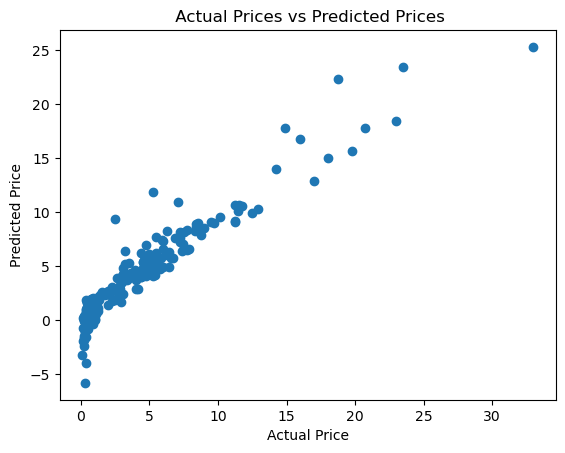

In [31]:
plt.scatter(train_set_y,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()